# Intro to Autoencoders

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

2025-09-04 20:25:30.248401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 20:25:30.394470: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)


2025-09-04 20:25:33.276051: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :
2025-09-04 20:25:33.276202: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-09-04 20:25:33.276217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c2118.swan.hcc.unl.edu): /proc/driver/nvidia/version does not exist
2025-09-04 20:25:33.276501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.008

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [27]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

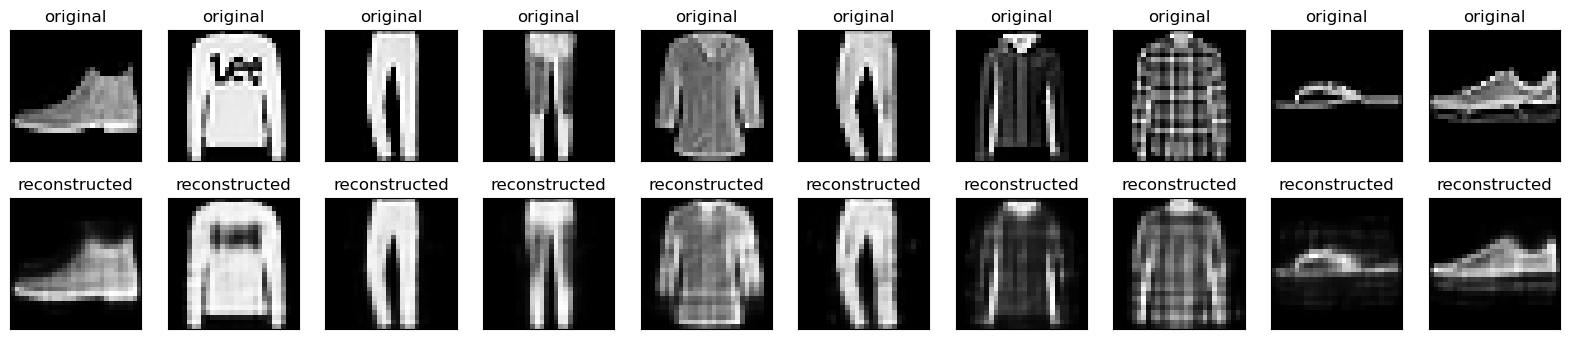

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model

latent_dim = 64
shape = (28, 28)

encoder_input = layers.Input(shape=shape, name='encoder_input')
x = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(latent_dim, activation='relu', name='encoder_output')(x)
encoder = Model(encoder_input, encoder_output, name='encoder')

decoder_input = layers.Input(shape=(latent_dim,), name='decoder_input')
num_pixels = shape[0] * shape[1]
x = layers.Dense(num_pixels, activation='sigmoid')(decoder_input)
decoder_output = layers.Reshape(shape, name='decoder_output')(x)
decoder = Model(decoder_input, decoder_output, name='decoder')

2025-09-04 20:55:10.231456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 20:55:10.371958: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-04 20:55:12.704109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :
2025-09-04 20:55:12.704130: W tensorflow/compiler/xla/stream_executor/cud

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Model, losses

latent_dim = 64
shape = (28, 28)

encoder_input = layers.Input(shape=shape, name='encoder_input')
x_enc = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(latent_dim, activation='relu', name='encoder_output')(x_enc)
encoder = Model(encoder_input, encoder_output, name='encoder')

decoder_input = layers.Input(shape=(latent_dim,), name='decoder_input')
num_pixels = shape[0] * shape[1]
x_dec = layers.Dense(num_pixels, activation='sigmoid')(decoder_input)
decoder_output = layers.Reshape(shape, name='decoder_output')(x_dec)
decoder = Model(decoder_input, decoder_output, name='decoder')

autoencoder_input = layers.Input(shape=shape, name='autoencoder_input')
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_input, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())